In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for plots
sns.set(style="whitegrid")



In [11]:
from google.colab import files

uploaded = files.upload()




Saving Sample - Superstore.csv to Sample - Superstore (1).csv


In [13]:
import os
print(os.listdir())



['.config', '.ipynb_checkpoints', 'Sample - Superstore.csv', 'sample_data']


In [16]:
import pandas as pd

df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')
print(df.head())
print(df.info())



   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [17]:
# Drop Postal Code column (not needed)
df.drop(['Postal Code'], axis=1, inplace=True)

# Convert Order Date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create Month column for monthly aggregation
df['Month'] = df['Order Date'].dt.to_period('M')


In [20]:
monthly['Month'] = monthly['Month'].astype(str)



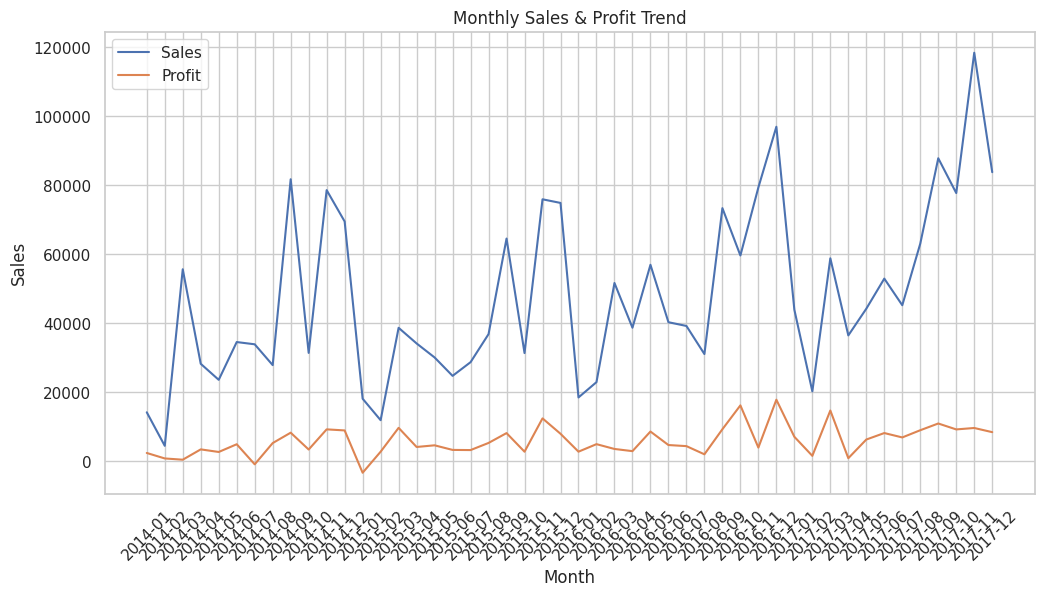

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly, x='Month', y='Sales', label='Sales')
sns.lineplot(data=monthly, x='Month', y='Profit', label='Profit')
plt.title("Monthly Sales & Profit Trend")
plt.xticks(rotation=45)
plt.show()


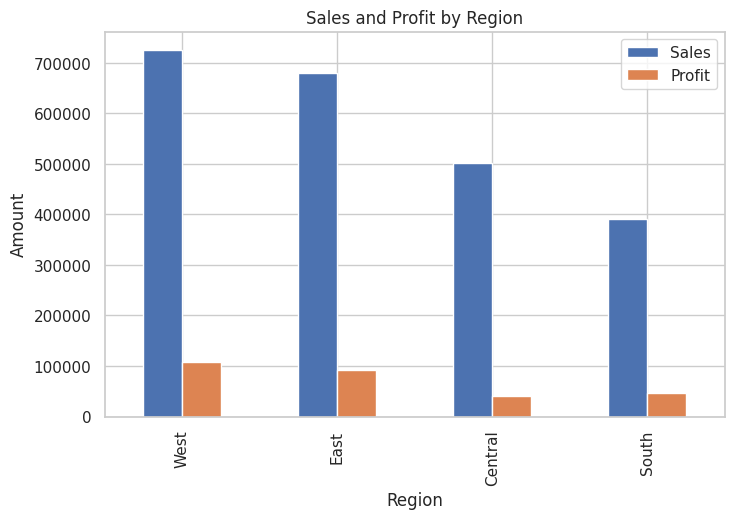

In [22]:
region_sales = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

region_sales.plot(kind='bar', figsize=(8,5), title='Sales and Profit by Region')
plt.ylabel('Amount')
plt.show()


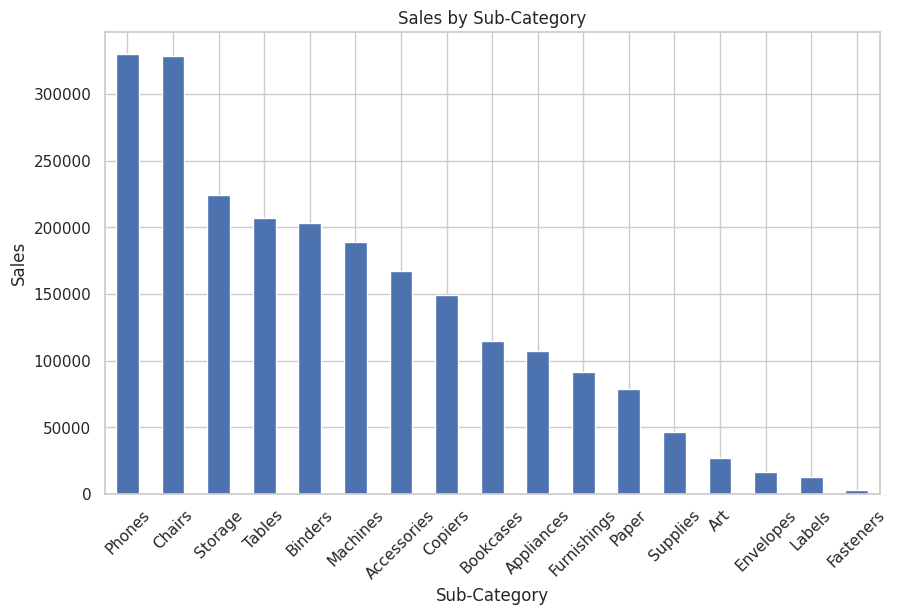

In [23]:
subcat_sales = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

plt.figure(figsize=(10,6))
subcat_sales['Sales'].plot(kind='bar')
plt.title('Sales by Sub-Category')
plt.xticks(rotation=45)
plt.ylabel('Sales')
plt.show()


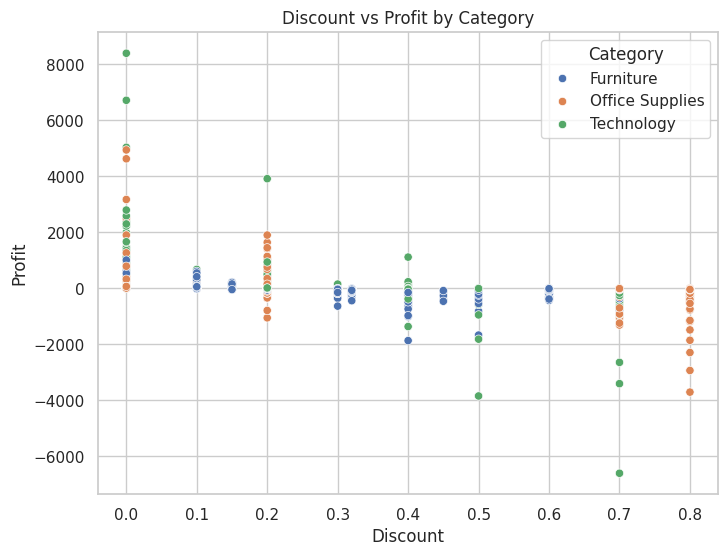

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Discount vs Profit by Category')
plt.show()


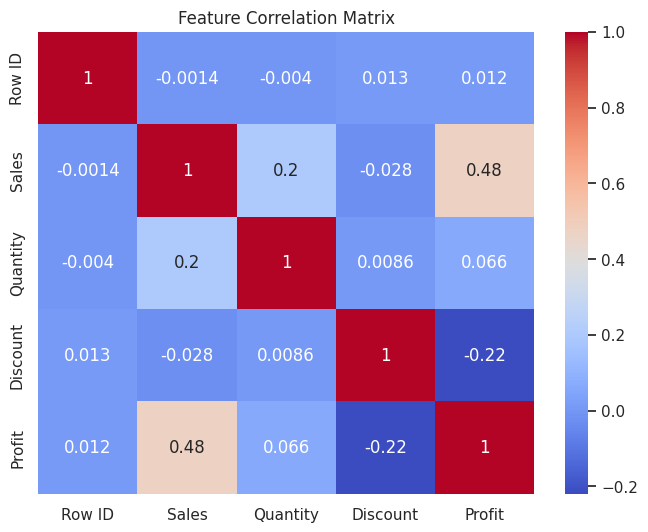

In [26]:
plt.figure(figsize=(8,6))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

